<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2022 - Homework 01</h1>

<h3 style="color:blue">2022-04-04</h3>

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
***

<h1 style="color:blue">Instructions</h1>

### Submissions: 

By **groups** of _about_ three students (meaning: two is OK, four is not advisable but possible. Individual homeworks 
will also be accepted but collaborative work is preferable). 

Please send me an **email** with the team members names as soon as you have formed it.

Only **one copy** of each group's work must be uploaded (by any member)

### Format: 

A Jupyter or R Markdown **notebook,** with a **header** clearly stating the names of all contributors. 

### Documentation: 

Comments **in code cells** (e.g., meaning of variables, parameters, purpose of functions) are necessary but not sufficient.

You are expected to give full explanations of steps taken in your solution (in **Markdown cells**), as well as discussion of results and their meaning.

Do not drear being too verbose or too elementary.

### External sources

Getting inspiration from any book, document, blog, wep page, even mimicking solutions given in there, is **allowed and encouraged,** provided you give a **proper reference,**
understand every such material, and explain it in you own words, even more exhaustively.

Dare not **copy/paste literally.** I do detect it, believe me, even with a missing source reference. Bleak consequences.

### Deadline:

Completed assignments are due on Tuesday, April 19. They are to be uploaded to the Virtual Campus.

<h1 style="color:blue">01 - Stan version of a conjugate prior problem</h1>

<h2 style="color:blue">Modelling Earthquake Waiting Times</h2>

Consider the problem in `Exponential.02.Earthquake` (notebook in 2022-03-28 folder), where the goal is to study earthquake waiting times.

Likelihood is modelled as an $\expdist(\lambda)$ and $\lambda$ is given a conjugate prior, $\lambda\sim\gammadist(\alpha,\beta)$.

In this notebook some simulations are performed for:

01. Prior pdf for $\lambda$.
02. Prior predictive pdf for the waiting time.
03. Posterior pdf for $\lambda$.
04. Posterior predictive for new waiting time.

In `Exponential.02.Earthquake` we use known theoretical (analytical) descriptions of these distributions.

Your task is to redo these simulations using Stan, disregarding analytical conjugate prior formulas, and then comparing your results to the analytical ones. Use this comparison to tune up adjustable parameters in Stan sampling, such as chain length. 

## Answer

First let's frame the problem we want to study, as it is explained in the aforementioned notebook. We want to build a bayesian model for waiting times between serious earthquakes. If we assume that:

1. Earthquakes are independent
2. The rate at which earthquakes occur does not change during the year 
3. The earthquake hazard rate does not change

then we can use an iid exponential model. The days of the year where major earhquakes happened are the following:

    January 4, January 20, January 28, May 22, July 21, July 25, August 17, September 16, December 30. 
    
Therefore our data vector will be 

$$
    \begin{array}{lcl}
    y &= &(3, 16, 8, 114, 60, 4, 23, 30, 105).
    \end{array}
$$

Let $Y_{i}$ denote the waiting time in days between the $i$-th earthquake and the following earthquake. Then our model is 

$$
    Y_{i}\mskip8mu\text{i.i.d.}\sim\mskip8mu\operatorname{Exponential}(\lambda),
$$

and the expected waiting time between earthquakes is $\operatorname{E}(Y)=1/\lambda$ days. 

### Prior distribution

We will assume that the prior follows a gamma distribution $\lambda\sim\operatorname{Gamma}(\alpha,\beta)$. The combination of modelling the prior as a Gamma distribution and the likelihood as an exponential makes the prior a conjugate prior, meaning that the posterior distribution will also be a Gamma.

Suppose our prior belief is that the expected time between earthquakes is $30$ days. This means that our prior expectation for $\lambda$ is $1/30$, and since the gamma expectation is $\alpha/\beta$, we have that $\alpha/\beta=1/30$. However, there are infinitely many combinations for $\alpha$ and $\beta$. 

It turns out that in the exponential-gamma model, $\alpha$ is the prior effective sample size (this is, "virtual" observations that will affect the posterior distribution), so if we set this parameter to a fixed value we will also determine $\beta$. The larger the value that $\alpha$ is set, the stronger weight our prior belief will have in determining the posterior, and consequently the less weight the observed data will have. 

In our case we will follow the teacher approach and we will set $\alpha=1$, and therefore $\beta=30$. 

The expectation, variance and standard deviation for the prior distribution are printed below.

In [1]:
prior.a<-1
prior.b<-30

Theor.lambda.mean<-prior.a/prior.b
# Theor.lambda.mode<-(prior.a-1)/prior.b  # For alpha>1, 0 for alpha=1.
Theor.lambda.var<-prior.a/prior.b^2
Theor.lambda.sd<-sqrt(Theor.lambda.var)
round(Theor.lambda.mean,4)
round(Theor.lambda.var,4)
round(Theor.lambda.sd,4)

[1] 0.0333

[1] 0.0011

[1] 0.0333

Using the code provided by the teacher in the notebook mentioned above, let's sample some data and also plot the density of the distribution.

In [25]:
N<-100000
Sim.lambda.prior<-rgamma(N,prior.a,prior.b)

str(Sim.lambda.prior)
summary(Sim.lambda.prior)
q.Sim.lambda.prior<-quantile(Sim.lambda.prior,c(0.025,0.25,0.50,0.75,0.975))
round(q.Sim.lambda.prior,2)
lambdamax<-max(q.Sim.lambda.prior)
round(lambdamax,2)
Sim.lambda.prior.trunc<-Sim.lambda.prior[Sim.lambda.prior<lambdamax]  # truncate in order to be able to plot the histogram
str(Sim.lambda.prior.trunc)

 num [1:100000] 0.0629 0.0392 0.0356 0.0329 0.0289 ...


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000006 0.0096947 0.0232918 0.0333735 0.0463249 0.4096135 

2.5%   25%   50%   75% 97.5% 
 0.00  0.01  0.02  0.05  0.12

[1] 0.12

 num [1:97500] 0.0629 0.0392 0.0356 0.0329 0.0289 ...


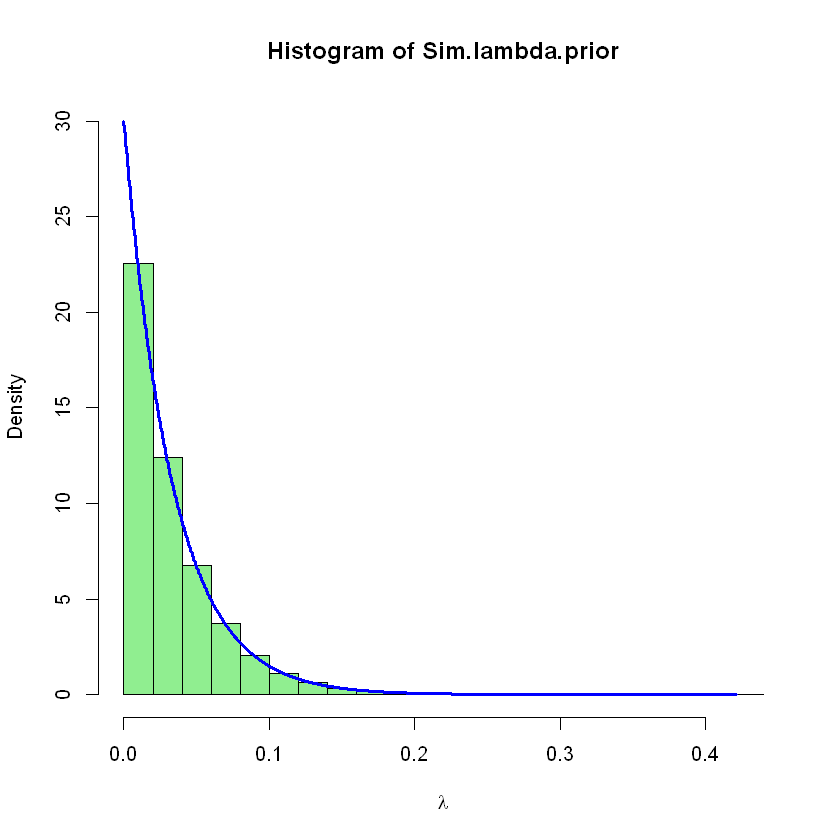

In [3]:
Theor.lambda.mean<-prior.a/prior.b
# Theor.lambda.mode<-(prior.a-1)/prior.b  # For alpha>1, 0 for alpha=1.
Theor.lambda.var<-prior.a/prior.b^2
Theor.lambda.sd<-sqrt(Theor.lambda.var)

# Plot histogram, compare with the theoretical Gamma pdf 
options(repr.plot.width=7,repr.plot.height=7)
hist(Sim.lambda.prior,freq=FALSE,col="LightGreen",xlab=expression(lambda),ylim=c(0,30),breaks=25)
v<-seq(0,max(Sim.lambda.prior),length=1000)
lines(v,dgamma(v,shape=prior.a,rate=prior.b),lwd=2.5,col="blue")

### Prior predictive distribution

In the exponential-gamma model, the prior predictive distribution

$$
    p(Y) = \int p(Y | \lambda) p(\lambda) d\lambda
$$

follows a Pareto II (Lomax) distribution, with density 

$$
    f(y)=\dfrac{\alpha\cdot\beta^{\alpha}}{(y+\beta)^{\alpha+1}},\mskip20mu y\geq 0,
$$

The expectation and variance of this distribution are:

$$
    \operatorname{E}(Y)=\dfrac{\beta}{\alpha-1},\mskip20mu\alpha>1,\mskip30mu
    \operatorname{var}(Y)=\dfrac{\beta^{2}\,\alpha}{(\alpha-1)^{2}\,(\alpha-2)},\mskip20mu \alpha>2,
$$

In our case, since $\alpha=1$ and $\beta=30$,

$$
    f(y)=\dfrac{30}{(y+30)^{2}},\mskip20mu y\geq 0,
$$

It is worth mentioning that since $\alpha \leq 1$, we have that there is no theoretical expectation nor variance.

Let's sample some values of the distribution and also plot its density.

 num [1:100000] 5.27 5.78 33.41 20.62 8.62 ...


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
      0.0       9.9      29.6     368.4      88.8 2145858.1 

2.5%     25%     50%     75%   97.5% 
   0.74    9.89   29.57   88.76 1185.18

[1] 1185.18

 num [1:97500] 5.27 5.78 33.41 20.62 8.62 ...


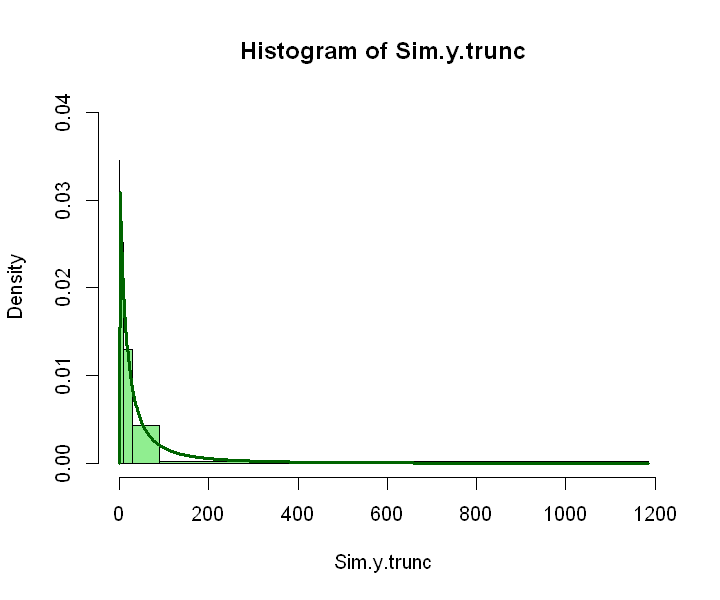

In [26]:
Theor.pred.pdf<-function(y,a,b){return(ifelse(y>0,a*b^{a}/(y+b)^(a+1),0))}

# Simulate from the prior predictive. Likelihood is exponential with parameter lambda
Sim.y<-rexp(N,rate=Sim.lambda.prior)

str(Sim.y)
summary(Sim.y)
q.Sim.y<-quantile(Sim.y,c(0.025,0.25,0.50,0.75,0.975))
round(q.Sim.y,2)
ymax<-max(q.Sim.y)
round(ymax,2)
Sim.y.trunc<-Sim.y[Sim.y<ymax]  # truncate in order to be able to plot the histogram
str(Sim.y.trunc)

# Plot histogram, 
options(repr.plot.width=6,repr.plot.height=5)
ymax<-max(q.Sim.y)
u<-seq(0,ymax,length=1000)
yu<-Theor.pred.pdf(u,a=prior.a,b=prior.b)
hist(Sim.y.trunc,freq=FALSE,col="LightGreen",breaks=c(min(Sim.y.trunc),q.Sim.y,max(Sim.y.trunc)),ylim=c(0,0.040))
lines(u,yu,lwd=2.5,col="DarkGreen")

### Posterior distribution

As we mentioned above, the exponential-gamma model makes the prior a conjugate prior, meaning that the posterior follows the same distribution as the prior. The posterior pdf is $\lambda\sim\operatorname{Gamma}(\alpha',\beta')$, with


$$
    \left\{
    \begin{array}{lcl}
    \alpha'&=&\alpha+n,\\[0.2cm]
    \beta'&=&\beta+n\,\overline{y}.
    \end{array}\right.
$$

In our case, since $n=8$, $\bar{y}=45$, $\alpha=1$ and $\beta=30$ we have that

$$
    \left\{
    \begin{array}{lcl}
    \alpha'&=&9,\\[0.2cm]
    \beta'&=&390.
    \end{array}\right.
$$

The expectation, mode, variance and standard deviation of the posterior distribution are printed below.

In [5]:
Theor.lambda.post.mean<-post.a/post.b
Theor.lambda.post.mode<-(post.a-1)/post.b  # For alpha>1, 0 for alpha=1.
Theor.lambda.post.var<-post.a/post.b^2
Theor.lambda.post.sd<-sqrt(Theor.lambda.post.var)
round(Theor.lambda.post.mean,4)
round(Theor.lambda.post.mode,4)
round(Theor.lambda.post.var,6)
round(Theor.lambda.post.sd,4)

ERROR: Error in eval(expr, envir, enclos): object 'post.a' not found


Next we sample some data from the posterior distribuion, and also plot its density.

 num [1:100000] 0.0238 0.0255 0.0235 0.0268 0.027 ...


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.003002 0.017587 0.022262 0.023090 0.027714 0.097067 

2.5%   25%   50%   75% 97.5% 
 0.01  0.02  0.02  0.03  0.04

[1] 0.04

 num [1:97500] 0.0238 0.0255 0.0235 0.0268 0.027 ...


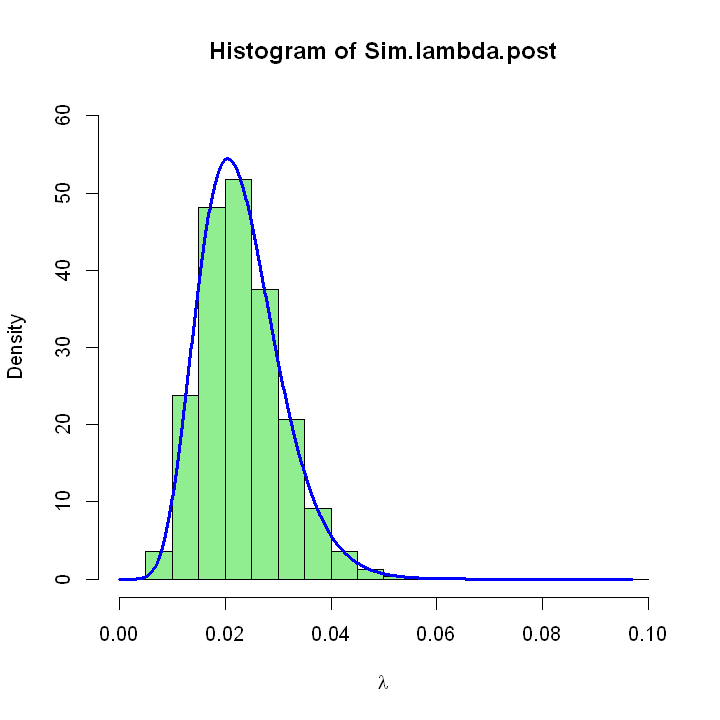

In [27]:
y<-c(16, 8, 114, 60, 4, 23, 30, 105)

n<-length(y)
ybar<-mean(y)
nybar<-sum(y)

post.a<-prior.a+n
post.b<-prior.b+nybar


Sim.lambda.post<-rgamma(N,post.a,post.b)

str(Sim.lambda.post)
summary(Sim.lambda.post)
q.Sim.lambda.post<-quantile(Sim.lambda.post,c(0.025,0.25,0.50,0.75,0.975))
round(q.Sim.lambda.post,2)
lambdamax<-max(q.Sim.lambda.post)
round(lambdamax,2)
Sim.lambda.post.trunc<-Sim.lambda.post[Sim.lambda.post<lambdamax]  # truncate in order to be able to plot the histogram
str(Sim.lambda.post.trunc)


# Plot histogram, superimpose the Gamma pdf 
options(repr.plot.width=6,repr.plot.height=6)
v<-seq(0,max(Sim.lambda.post),length=1000)
yv<-dgamma(v,shape=post.a,rate=post.b)
max.yv<-max(yv)
hist(Sim.lambda.post,freq=FALSE,col="LightGreen",xlab=expression(lambda),ylim=c(0,max.yv*1.1),breaks=25)
lines(v,yv,lwd=2.5,col="blue")

### Posterior predictive distribution

Since the exponential-gamma model makes the prior conjugate, we have that the posterior predictive distribution will be the same as the prior predictive distribution. In our case, as we explained before, it will be a Pareto II (Lomax) distribution, with density 

$$
    f(y)=\dfrac{\alpha\cdot\beta^{\alpha}}{(y+\beta)^{\alpha+1}},\mskip20mu y\geq 0,
$$

In our case, $\alpha=9$ and $\beta=390$. The expectation, variance and standard deviation are printed below.

In [7]:
Theor.post.E.y<-post.b/(post.a-1)
Theor.post.var.y<-post.b^2*post.a/((post.a-1)^2*(post.a-2))
Theor.post.sd.y<-sqrt(Theor.post.var.y)
round(Theor.post.E.y,3)
round(Theor.post.var.y,3)
round(Theor.post.sd.y,3)

[1] 48.75

[1] 3055.58

[1] 55.277

Next we sample some data from the posterior predictive distribution, and also plot its density.

 num [1:100000] 5.27 5.78 33.41 20.62 8.62 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   12.68   31.06   48.41   64.50 1074.87 

2.5%    25%    50%    75%  97.5% 
  1.07  12.68  31.06  64.50 197.06

[1] 197.06

 num [1:97500] 59.6 26.6 54.2 31.3 25.2 ...


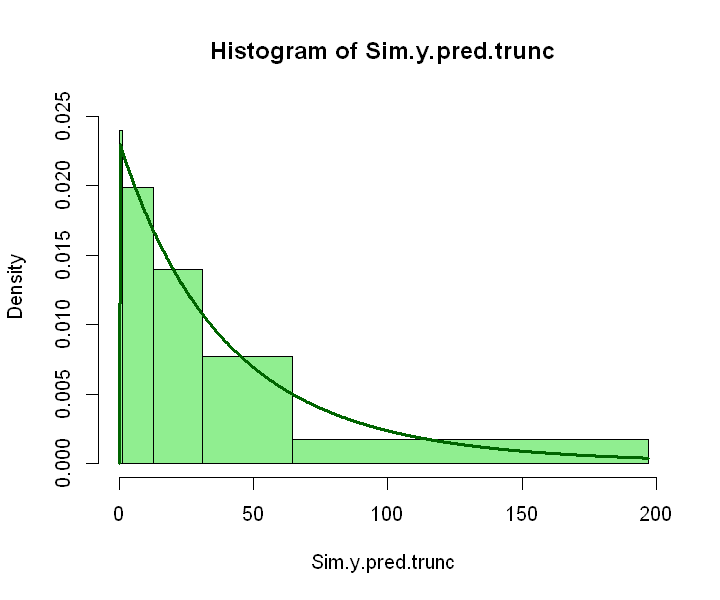

In [28]:
Sim.y.pred<-rexp(N,rate=Sim.lambda.post)

str(Sim.y)
summary(Sim.y.pred)
q.Sim.y.pred<-quantile(Sim.y.pred,c(0.025,0.25,0.50,0.75,0.975))
round(q.Sim.y.pred,2)
ymax<-max(q.Sim.y.pred)
round(ymax,2)
Sim.y.pred.trunc<-Sim.y.pred[Sim.y.pred<ymax]  # truncate in order to be able to plot the histogram
str(Sim.y.pred.trunc)

# Plot histogram, 
options(repr.plot.width=6,repr.plot.height=5)
u<-seq(0,ymax,length=1000)
yu<-Theor.pred.pdf(u,a=post.a,b=post.b)
ymax<-max(yu)
hist(Sim.y.pred.trunc,freq=FALSE,col="LightGreen",
     breaks=c(min(Sim.y.pred.trunc),q.Sim.y.pred,max(Sim.y.pred.trunc)),ylim=c(0,ymax*1.1))
lines(u,yu,lwd=2.5,col="DarkGreen")

## Stan simulation

Next let's redo the simulations for the posterior and the posterior predictive distributions without using any analytical conjugate prior formulas. We will be using Stan. This code is strongly based in the one provided in the notebook `02.Exponential.01.Claims.Stan`.

In [14]:
require(rstan)

options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

In [15]:
stanmodelcode <- "
data {
    int<lower=0> n;
    real<lower=0> prior_a;
    real<lower=0> prior_b;
    real<lower=0> y[n];
    }
parameters {
    real<lower=0.00001> lambda;
    }
model {
    lambda ~ gamma(prior_a,prior_b);
    y~exponential(lambda);
    }
generated quantities{                // Sampling from the lambda posterior
    real y_pred;
    y_pred = exponential_rng(lambda);
    }
    "

In [11]:
stanDso <- stan_model(model_code = stanmodelcode) 

In [12]:
dat <- list(n = n, y = y, prior_a=prior.a, prior_b=prior.b); 

Next we can see some of the percentiles of the sampled quantiles from the posterior and posterior predicitve distributions. The hyperparameters are the same as the ones provided in the Claims notebook (the chains value is not explicitly set to 4, however this is the default value in the sampling() function).

In [16]:
fit1 <- sampling(stanDso, data = dat, iter = 20000, warmup=1000, chains=4) 
fit1

Inference for Stan model: e0ab43bf64cd32704028c1145a4f3463.
4 chains, each with iter=20000; warmup=1000; thin=1; 
post-warmup draws per chain=19000, total post-warmup draws=76000.

         mean se_mean    sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
lambda   0.02    0.00  0.01   0.01   0.02   0.02   0.03   0.04 24907    1
y_pred  49.26    0.23 55.97   1.14  12.70  31.43  65.35 200.14 60083    1
lp__   -43.43    0.00  0.72 -45.49 -43.60 -43.15 -42.97 -42.92 31788    1

Samples were drawn using NUTS(diag_e) at Sun Apr 24 12:54:54 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

The mean for the posterior distribution is 0.02, which matches the theoretical expectation that we saw earlier. The same can be said about the standard deviation, which is 0.01. Moreover, the sampled quantiles match the ones we obtained before.

What about the posterior predictive distribution? Here the mean is 49.26, while the theoretical expectation is 48.75. Let's tune the warmup hyperparameter, which is usually set to iter/2.

In [40]:
fit2 <- sampling(stanDso, data = dat, iter = 20000, warmup=10000, chains=4) 
fit2

Inference for Stan model: e0ab43bf64cd32704028c1145a4f3463.
4 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=40000.

         mean se_mean    sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
lambda   0.02    0.00  0.01   0.01   0.02   0.02   0.03   0.04 14916    1
y_pred  48.75    0.30 55.01   1.18  12.56  31.44  65.27 198.71 32802    1
lp__   -43.43    0.01  0.72 -45.49 -43.59 -43.15 -42.97 -42.92 16816    1

Samples were drawn using NUTS(diag_e) at Sun Apr 24 13:15:35 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

We can see that we have reduced the distance between the sampled mean, which now is 48.75, and the theoretical expectation. The sampled standard deviation is 55.01, not far away from the theoretical one 55.27.

Let's also adjust the chains hyperparameters, which specifies the number of Markov chains.

In [41]:
fit3 <- sampling(stanDso, data = dat, iter = 20000, warmup=10000, chains=3) 
fit3

Inference for Stan model: e0ab43bf64cd32704028c1145a4f3463.
3 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=30000.

         mean se_mean    sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
lambda   0.02    0.00  0.01   0.01   0.02   0.02   0.03   0.04 11425    1
y_pred  48.80    0.36 55.94   1.04  12.45  31.26  65.15 199.05 24218    1
lp__   -43.43    0.01  0.72 -45.49 -43.59 -43.15 -42.97 -42.92  9234    1

Samples were drawn using NUTS(diag_e) at Sun Apr 24 13:15:56 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [42]:
fit4 <- sampling(stanDso, data = dat, iter = 20000, warmup=10000, chains=5) 
fit4

Inference for Stan model: e0ab43bf64cd32704028c1145a4f3463.
5 chains, each with iter=20000; warmup=10000; thin=1; 
post-warmup draws per chain=10000, total post-warmup draws=50000.

         mean se_mean    sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
lambda   0.02    0.00  0.01   0.01   0.02   0.02   0.03   0.04 17576    1
y_pred  48.74    0.27 55.51   1.08  12.73  31.28  64.97 196.03 41509    1
lp__   -43.43    0.01  0.73 -45.51 -43.59 -43.15 -42.97 -42.92 19174    1

Samples were drawn using NUTS(diag_e) at Sun Apr 24 13:16:10 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

It seems like varying the number of Markov chains does not affect the result much, so we will keep the number of Markov chains at 4.

In [43]:
lambda <- extract(fit2, 'lambda')
lambda <- unlist(lambda, use.names=FALSE)
y_pred <- extract(fit2, 'y_pred')
y_pred <- unlist(y_pred, use.names=FALSE)

In [46]:
require(actuar) # Required for pareto distribution

Finally we will plot the density functions for the prior, analytical posterior (this is, using the fact that the prior is conjugate) and the sampled posterior (the one we just simulated using Stan, without using that the prior is conjugate). We do the same for the posterior predictive.

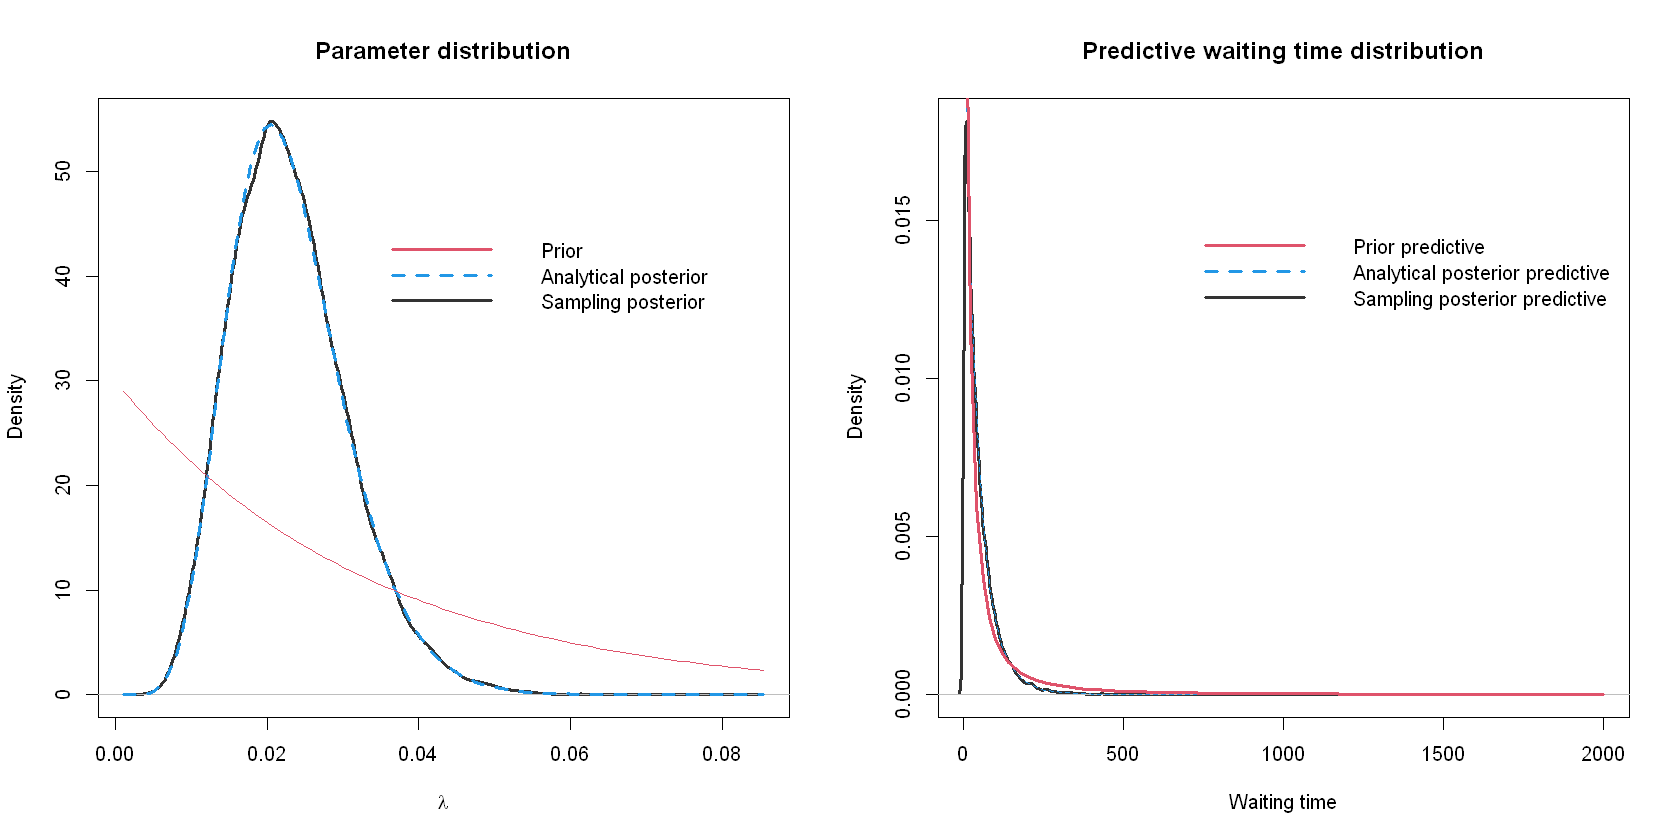

In [47]:
options(repr.plot.width=14,repr.plot.height=7)
old.par<- par(mfrow=c(1,2))
# Simulated posterior parameter
plot(density(lambda),
     xlab=expression(lambda), col=grey(0, 0.8),lwd=3,
     main="Parameter distribution")
# Analytical posterior parameter
curve(dgamma(x, post.a, post.b), 
      add=TRUE, col=4, lty=2, lwd=2.5)
# Analytical prior parameter
curve(dgamma(x, prior.a, prior.b), 
      add=TRUE, col=2)
legend(x=0.03,y=45,legend=c("Prior", "Analytical posterior", "Sampling posterior"), 
           col=c(2, 4, grey(0, 0.8)), lty=c(1,2,1), bty="n",lwd=3)
# Simulated posterior predictive
plot(density(y_pred), xlim=c(1,2000),
     xlab="Waiting time", col=grey(0, 0.8),
     main="Predictive waiting time distribution",lwd=3)
# Analytical posterior predictive
curve(dpareto(x, post.a, post.b), 
      add=TRUE, col=4, lwd=1.5, lty=2,5)
# Analytical prior predictive
curve(dpareto(x, prior.a, prior.b), 
      add=TRUE, col=2,lwd=3)
legend(x=600,y=0.015, legend=c("Prior predictive","Analytical posterior predictive", "Sampling posterior predictive"),
           col=c(2, 4, grey(0, 0.8)),lwd=3, lty=c(1,2,1), bty="n")
par(old.par)

<h1 style="color:blue">02 - A more elaborate mixture prior for the spinning coin</h1>

(continued from Diaconis experiment)

On reflection, it was decided that tails had come up more often than heads in the past; further some coins seemed likely to be symmetric. 

Thus, a final approximation to the prior was taken as:

$$
   \mskip-800mu 0.50\cdot\betadist(10,20) + 0.20\cdot\betadist(15,15) + 0.30\cdot\betadist(20,10).
$$

Same observed data as in the previous model.

In [1]:
# Number of trials
n<-10
# Observed x
x.obs<-3

Perform a complete Bayesian analysis of this model, in close parallel to the first example.

(1) Using the theoretical formulas (prior predictive pmf, posterior pdf, posterior predictive pmf)

(2) Using independent random numbers (`rbeta()` functions, etc.)

(3) JAGS version

(4)$ {}^{\star}$ Stan version. 

>$ (\star)$ Hint: this one **is difficult** due to intrinsic limitations in Stan. There are several known workarounds; you can try to find one but do not despair if you fail to develop a workable version.

>As a matter of fact even a Stan version of the two-components prior mixture in `Mixture.priors.02.ipynb` 
is rather tricky: Stan does not allow integer parameters thus the JAGS code cannot be translated literally.

Diaconis and Ylvisaker (1985) compare both mixture conjugate priors with a $ \operatorname{Unif}(0,1)$ prior with the data above. 

Comparing the MAP estimators, they observe that in a first approximation, they coincide, but spreads do depend on the prior.

They repeat the computations above with a larger sample. 

In [2]:
n1<-50
x1.obs<-14

Their conclusion is that with small data, prior matters, but with larger samples, a finely tuned choice of prior is less important.